+-----+-------+------+------+
|Month|Revenue|Profit|Region|
+-----+-------+------+------+
|  Jan|  12000|  3000| North|
|  Feb|  15000|  3500| South|
|  Mar|  17000|  4000|  East|
|  Apr|  14000|  3200|  West|
|  May|  18000|  4500| North|
|  Jun|  22000|  6000| South|
|  Jul|  24000|  6500|  East|
|  Aug|  20000|  5800|  West|
|  Sep|  23000|  6200| North|
|  Oct|  25000|  7000| South|
|  Nov|  27000|  7500|  East|
|  Dec|  30000|  8000|  West|
+-----+-------+------+------+



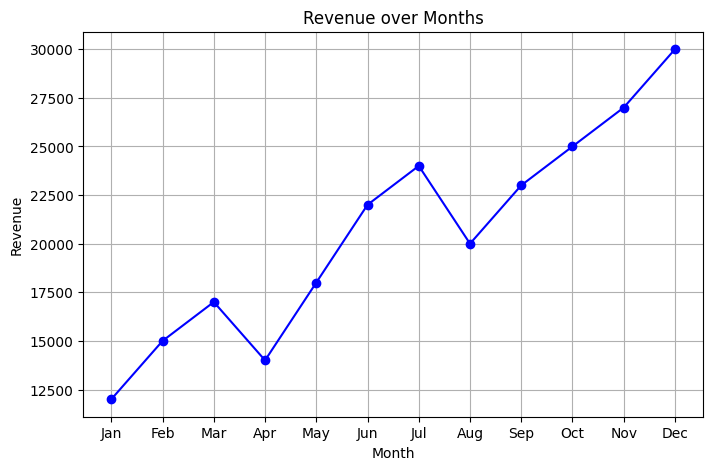

In [1]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

spark = SparkSession.builder.appName("SalesDataVisualization").getOrCreate()

data = [
    ("Jan", 12000, 3000, "North"),
    ("Feb", 15000, 3500, "South"),
    ("Mar", 17000, 4000, "East"),
    ("Apr", 14000, 3200, "West"),
    ("May", 18000, 4500, "North"),
    ("Jun", 22000, 6000, "South"),
    ("Jul", 24000, 6500, "East"),
    ("Aug", 20000, 5800, "West"),
    ("Sep", 23000, 6200, "North"),
    ("Oct", 25000, 7000, "South"),
    ("Nov", 27000, 7500, "East"),
    ("Dec", 30000, 8000, "West")
]

columns = ["Month", "Revenue", "Profit", "Region"]
df = spark.createDataFrame(data, columns)
df.show()

pdf = df.toPandas()

plt.figure(figsize=(8,5))
plt.plot(pdf["Month"], pdf["Revenue"], marker='o', color='b')
plt.title("Revenue over Months")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.grid(True)
plt.show()

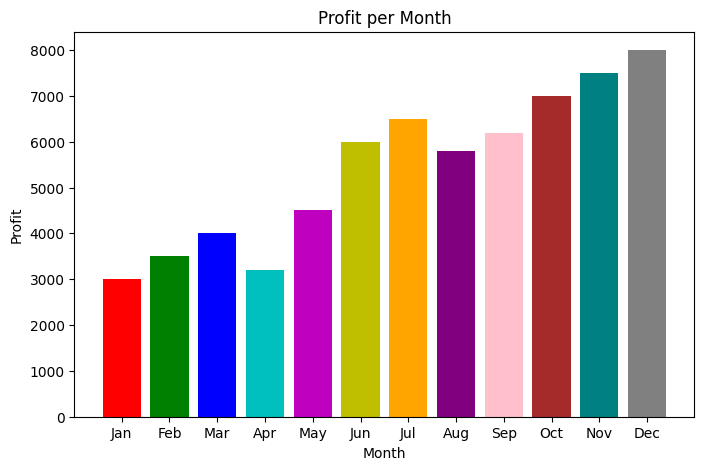

In [2]:
plt.figure(figsize=(8,5))
plt.bar(pdf["Month"], pdf["Profit"], color=['r','g','b','c','m','y','orange','purple','pink','brown','teal','grey'])
plt.title("Profit per Month")
plt.xlabel("Month")
plt.ylabel("Profit")
plt.show()

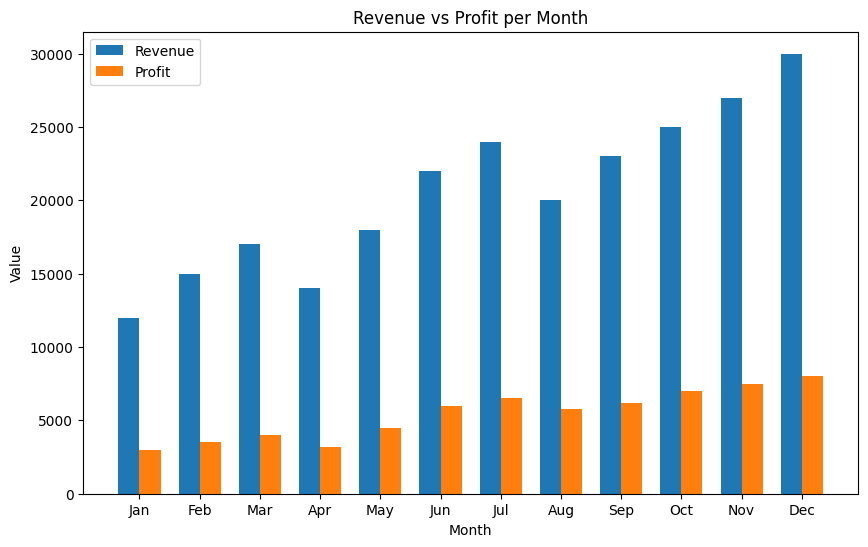

In [3]:
import numpy as np
x = np.arange(len(pdf["Month"]))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - width/2, pdf["Revenue"], width, label="Revenue")
plt.bar(x + width/2, pdf["Profit"], width, label="Profit")
plt.xticks(x, pdf["Month"])
plt.title("Revenue vs Profit per Month")
plt.xlabel("Month")
plt.ylabel("Value")
plt.legend()
plt.show()

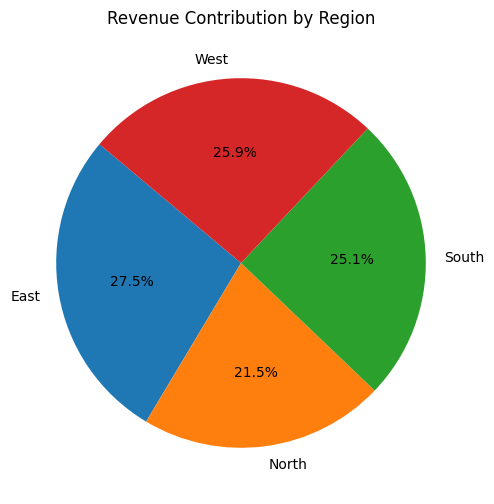

In [4]:
region_revenue = pdf.groupby("Region")["Revenue"].sum()
plt.figure(figsize=(6,6))
plt.pie(region_revenue, labels=region_revenue.index, autopct='%1.1f%%', startangle=140)
plt.title("Revenue Contribution by Region")
plt.show()

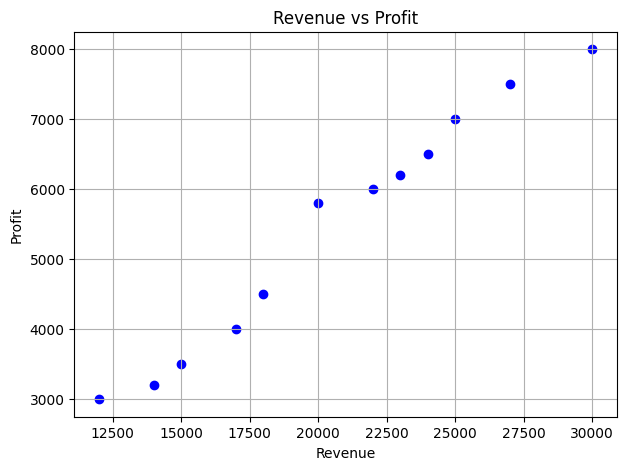

In [5]:
plt.figure(figsize=(7,5))
plt.scatter(pdf["Revenue"], pdf["Profit"], color="blue")
plt.title("Revenue vs Profit")
plt.xlabel("Revenue")
plt.ylabel("Profit")
plt.grid(True)
plt.show()

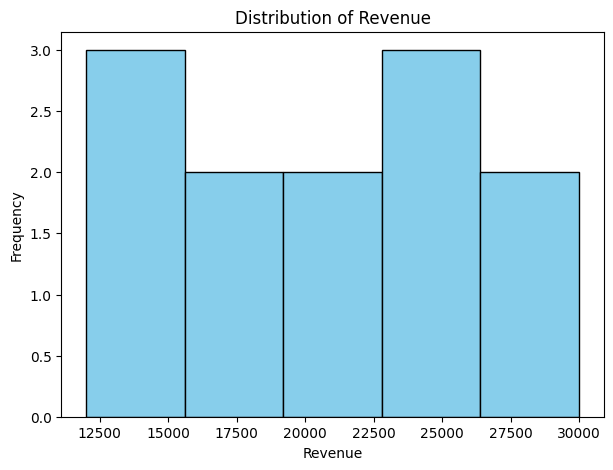

In [6]:
plt.figure(figsize=(7,5))
plt.hist(pdf["Revenue"], bins=5, color="skyblue", edgecolor="black")
plt.title("Distribution of Revenue")
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.show()

<Figure size 700x500 with 0 Axes>

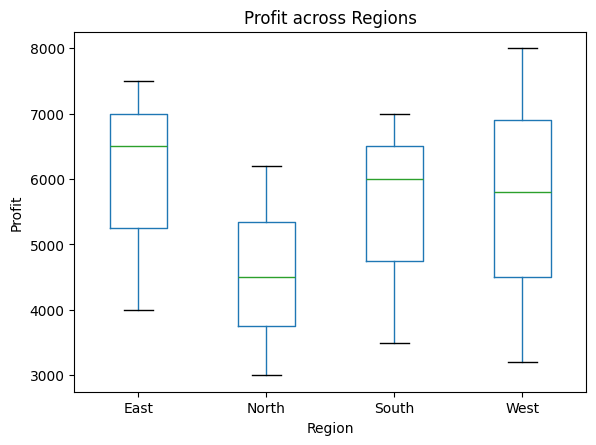

In [7]:
plt.figure(figsize=(7,5))
pdf.boxplot(column="Profit", by="Region", grid=False)
plt.title("Profit across Regions")
plt.suptitle("")  # remove automatic title
plt.xlabel("Region")
plt.ylabel("Profit")
plt.show()